In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv(r'C:\Users\jorda\Documents\School\Senior\Spring 2021\DS340W\Project\Sports-Betting-340W-main\Data\finalDataFrame.csv')

In [3]:
df.drop(['a_team_id', 'home_team_id','game_number'], inplace=True,axis=1)

In [4]:
df.shape

(123623, 46)

In [5]:
df.describe()

,book_id,home_w_pct,home_fg_pct,home_fg3_pct,home_ft_pct,home_reb,home_ast,home_stl,home_blk,home_tov,...,away_fg3m,away_fg3a,away_fga,away_ftm,away_fta,away_oreb,away_dreb,away_pf,homeTeamPrice,awayTeamPrice
count,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,...,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000
mean,191137.618687,0.508817,0.716709,0.353178,0.984768,42.562450,21.723924,7.663375,4.942493,14.022446,...,7.647645,21.474677,82.616218,17.906521,23.612114,10.780103,31.782542,20.680983,-57.117632,-46.264142
std,392773.896124,0.191092,0.266518,0.032745,0.032539,2.359344,2.274453,1.123916,0.961491,1.478111,...,2.181668,5.456253,3.347900,2.392680,3.095899,1.535055,2.177833,1.841961,537.970613,518.930270
min,19.000000,0.000000,0.000000,0.000000,0.000000,24.000000,8.000000,2.000000,0.000000,4.000000,...,0.000000,6.333333,55.000000,5.000000,8.000000,2.000000,16.000000,12.000000,-13131.000000,-11450.000000
25%,139.000000,0.376579,0.453860,0.337113,0.977273,41.085106,20.320755,6.967742,4.300000,13.100000,...,6.064516,17.492754,80.444444,16.368421,21.560000,9.750000,30.260870,19.470588,-235.000000,-240.000000
50%,238.000000,0.505794,0.507000,0.354197,1.000000,42.537500,21.609375,7.588235,4.875000,14.000000,...,7.444444,20.756098,82.731707,17.800000,23.451613,10.758065,31.768116,20.545455,-105.000000,-110.000000
75%,1275.000000,0.647574,1.000000,0.370857,1.000000,44.000000,22.977273,8.333333,5.474359,14.807018,...,9.000000,25.121212,85.000000,19.222222,25.415094,11.842857,33.272727,21.818182,200.000000,200.000000
max,999996.000000,1.000000,1.000000,0.750000,1.000000,65.000000,36.000000,18.000000,15.000000,27.000000,...,19.333333,52.000000,103.000000,38.000000,56.000000,23.000000,47.000000,42.000000,6725.000000,6500.000000


In [6]:
df.columns

Index(['book_id', 'home_w_pct', 'home_fg_pct', 'home_fg3_pct', 'home_ft_pct',
       'home_reb', 'home_ast', 'home_stl', 'home_blk', 'home_tov', 'home_pts',
       'home_w', 'home_l', 'home_fgm', 'home_fg3m', 'home_fg3a', 'home_fga',
       'home_ftm', 'home_fta', 'home_oreb', 'home_dreb', 'home_pf',
       'away_team_id', 'away_w_pct', 'away_fg_pct', 'away_fg3_pct',
       'away_ft_pct', 'away_reb', 'away_ast', 'away_stl', 'away_blk',
       'away_tov', 'away_pts', 'away_w', 'away_l', 'away_fgm', 'away_fg3m',
       'away_fg3a', 'away_fga', 'away_ftm', 'away_fta', 'away_oreb',
       'away_dreb', 'away_pf', 'homeTeamPrice', 'awayTeamPrice'],
      dtype='object')

In [7]:
df.book_id.value_counts()

19        14692
238       14613
93        14597
1275      13466
999991    12759
1096      12759
180       11743
999996    10829
139        9574
169        8591
Name: book_id, dtype: int64

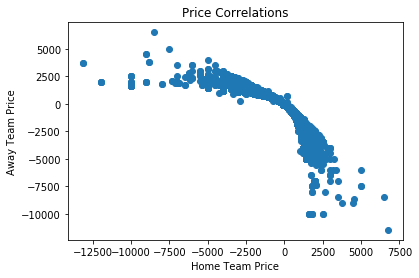

In [8]:
plt.scatter(df['homeTeamPrice'], df['awayTeamPrice'])
plt.title("Price Correlations")
plt.xlabel("Home Team Price")
plt.ylabel("Away Team Price")
plt.show()

In [9]:
df['diff_reb'] = df['home_reb'] - df['away_reb']
df['diff_oreb'] = df['home_oreb'] - df['away_oreb']
df['diff_dreb'] = df['home_dreb'] - df['away_dreb']
df['diff_fg_pct'] = df['home_fg_pct'] - df['away_fg_pct']
df['diff_fg3_pct'] = df['home_fg_pct'] - df['away_fg_pct']
df['diff_w_pct'] = df['home_w_pct'] - df['away_w_pct']
df['diff_pts'] = df['home_pts'] - df['away_pts']
df['diff_ast'] = df['home_ast'] - df['away_ast']
df['diff_stl'] = df['home_stl'] - df['away_stl']
df['diff_blk'] = df['home_blk'] - df['away_blk']
df['diff_pts'] = df['home_pts'] - df['away_pts']
df['diff_tov'] = df['home_tov'] - df['away_tov']
df['diff_fta'] = df['home_fta'] - df['away_fta']
df['diff_ftm'] = df['home_ftm'] - df['away_ftm']
df['diff_fga'] = df['home_fga'] - df['away_fga']
df['diff_fgm'] = df['home_fgm'] - df['away_fgm']
df['diff_fg3a'] = df['home_fg3a'] - df['away_fga']
df['diff_fg3m'] = df['home_fg3m'] - df['away_fg3m']
df['diff_stl'] = df['home_stl'] - df['away_stl']

In [10]:
df.shape

(123623, 63)

In [11]:
df.columns

Index(['book_id', 'home_w_pct', 'home_fg_pct', 'home_fg3_pct', 'home_ft_pct',
       'home_reb', 'home_ast', 'home_stl', 'home_blk', 'home_tov', 'home_pts',
       'home_w', 'home_l', 'home_fgm', 'home_fg3m', 'home_fg3a', 'home_fga',
       'home_ftm', 'home_fta', 'home_oreb', 'home_dreb', 'home_pf',
       'away_team_id', 'away_w_pct', 'away_fg_pct', 'away_fg3_pct',
       'away_ft_pct', 'away_reb', 'away_ast', 'away_stl', 'away_blk',
       'away_tov', 'away_pts', 'away_w', 'away_l', 'away_fgm', 'away_fg3m',
       'away_fg3a', 'away_fga', 'away_ftm', 'away_fta', 'away_oreb',
       'away_dreb', 'away_pf', 'homeTeamPrice', 'awayTeamPrice', 'diff_reb',
       'diff_oreb', 'diff_dreb', 'diff_fg_pct', 'diff_fg3_pct', 'diff_w_pct',
       'diff_pts', 'diff_ast', 'diff_stl', 'diff_blk', 'diff_tov', 'diff_fta',
       'diff_ftm', 'diff_fga', 'diff_fgm', 'diff_fg3a', 'diff_fg3m'],
      dtype='object')

In [12]:
oneHot = pd.get_dummies(df['book_id'])
df.drop(['book_id'], inplace=True, axis=1)
df = df.join(oneHot)

In [13]:
df.columns

Index([   'home_w_pct',   'home_fg_pct',  'home_fg3_pct',   'home_ft_pct',
            'home_reb',      'home_ast',      'home_stl',      'home_blk',
            'home_tov',      'home_pts',        'home_w',        'home_l',
            'home_fgm',     'home_fg3m',     'home_fg3a',      'home_fga',
            'home_ftm',      'home_fta',     'home_oreb',     'home_dreb',
             'home_pf',  'away_team_id',    'away_w_pct',   'away_fg_pct',
        'away_fg3_pct',   'away_ft_pct',      'away_reb',      'away_ast',
            'away_stl',      'away_blk',      'away_tov',      'away_pts',
              'away_w',        'away_l',      'away_fgm',     'away_fg3m',
           'away_fg3a',      'away_fga',      'away_ftm',      'away_fta',
           'away_oreb',     'away_dreb',       'away_pf', 'homeTeamPrice',
       'awayTeamPrice',      'diff_reb',     'diff_oreb',     'diff_dreb',
         'diff_fg_pct',  'diff_fg3_pct',    'diff_w_pct',      'diff_pts',
            'diff_ast',  

In [14]:
X = df[['home_w_pct',   'home_fg_pct',  'home_fg3_pct',   'home_ft_pct',
            'home_reb',      'home_ast',      'home_stl',      'home_blk',
            'home_tov',      'home_pts',        'home_w',        'home_l',
            'home_fgm',     'home_fg3m',     'home_fg3a',      'home_fga',
            'home_ftm',      'home_fta',     'home_oreb',     'home_dreb',
             'home_pf',  'away_team_id',    'away_w_pct',   'away_fg_pct',
        'away_fg3_pct',   'away_ft_pct',      'away_reb',      'away_ast',
            'away_stl',      'away_blk',      'away_tov',      'away_pts',
              'away_w',        'away_l',      'away_fgm',     'away_fg3m',
           'away_fg3a',      'away_fga',      'away_ftm',      'away_fta',
           'away_oreb',     'away_dreb',       'away_pf',
                            'diff_reb',     'diff_oreb',     'diff_dreb',
         'diff_fg_pct',  'diff_fg3_pct',    'diff_w_pct',      'diff_pts',
            'diff_ast',      'diff_stl',      'diff_blk',      'diff_tov',
            'diff_fta',      'diff_ftm',      'diff_fga',      'diff_fgm',
           'diff_fg3a',     'diff_fg3m']]
yHome = df['homeTeamPrice']
yAway = df['awayTeamPrice']

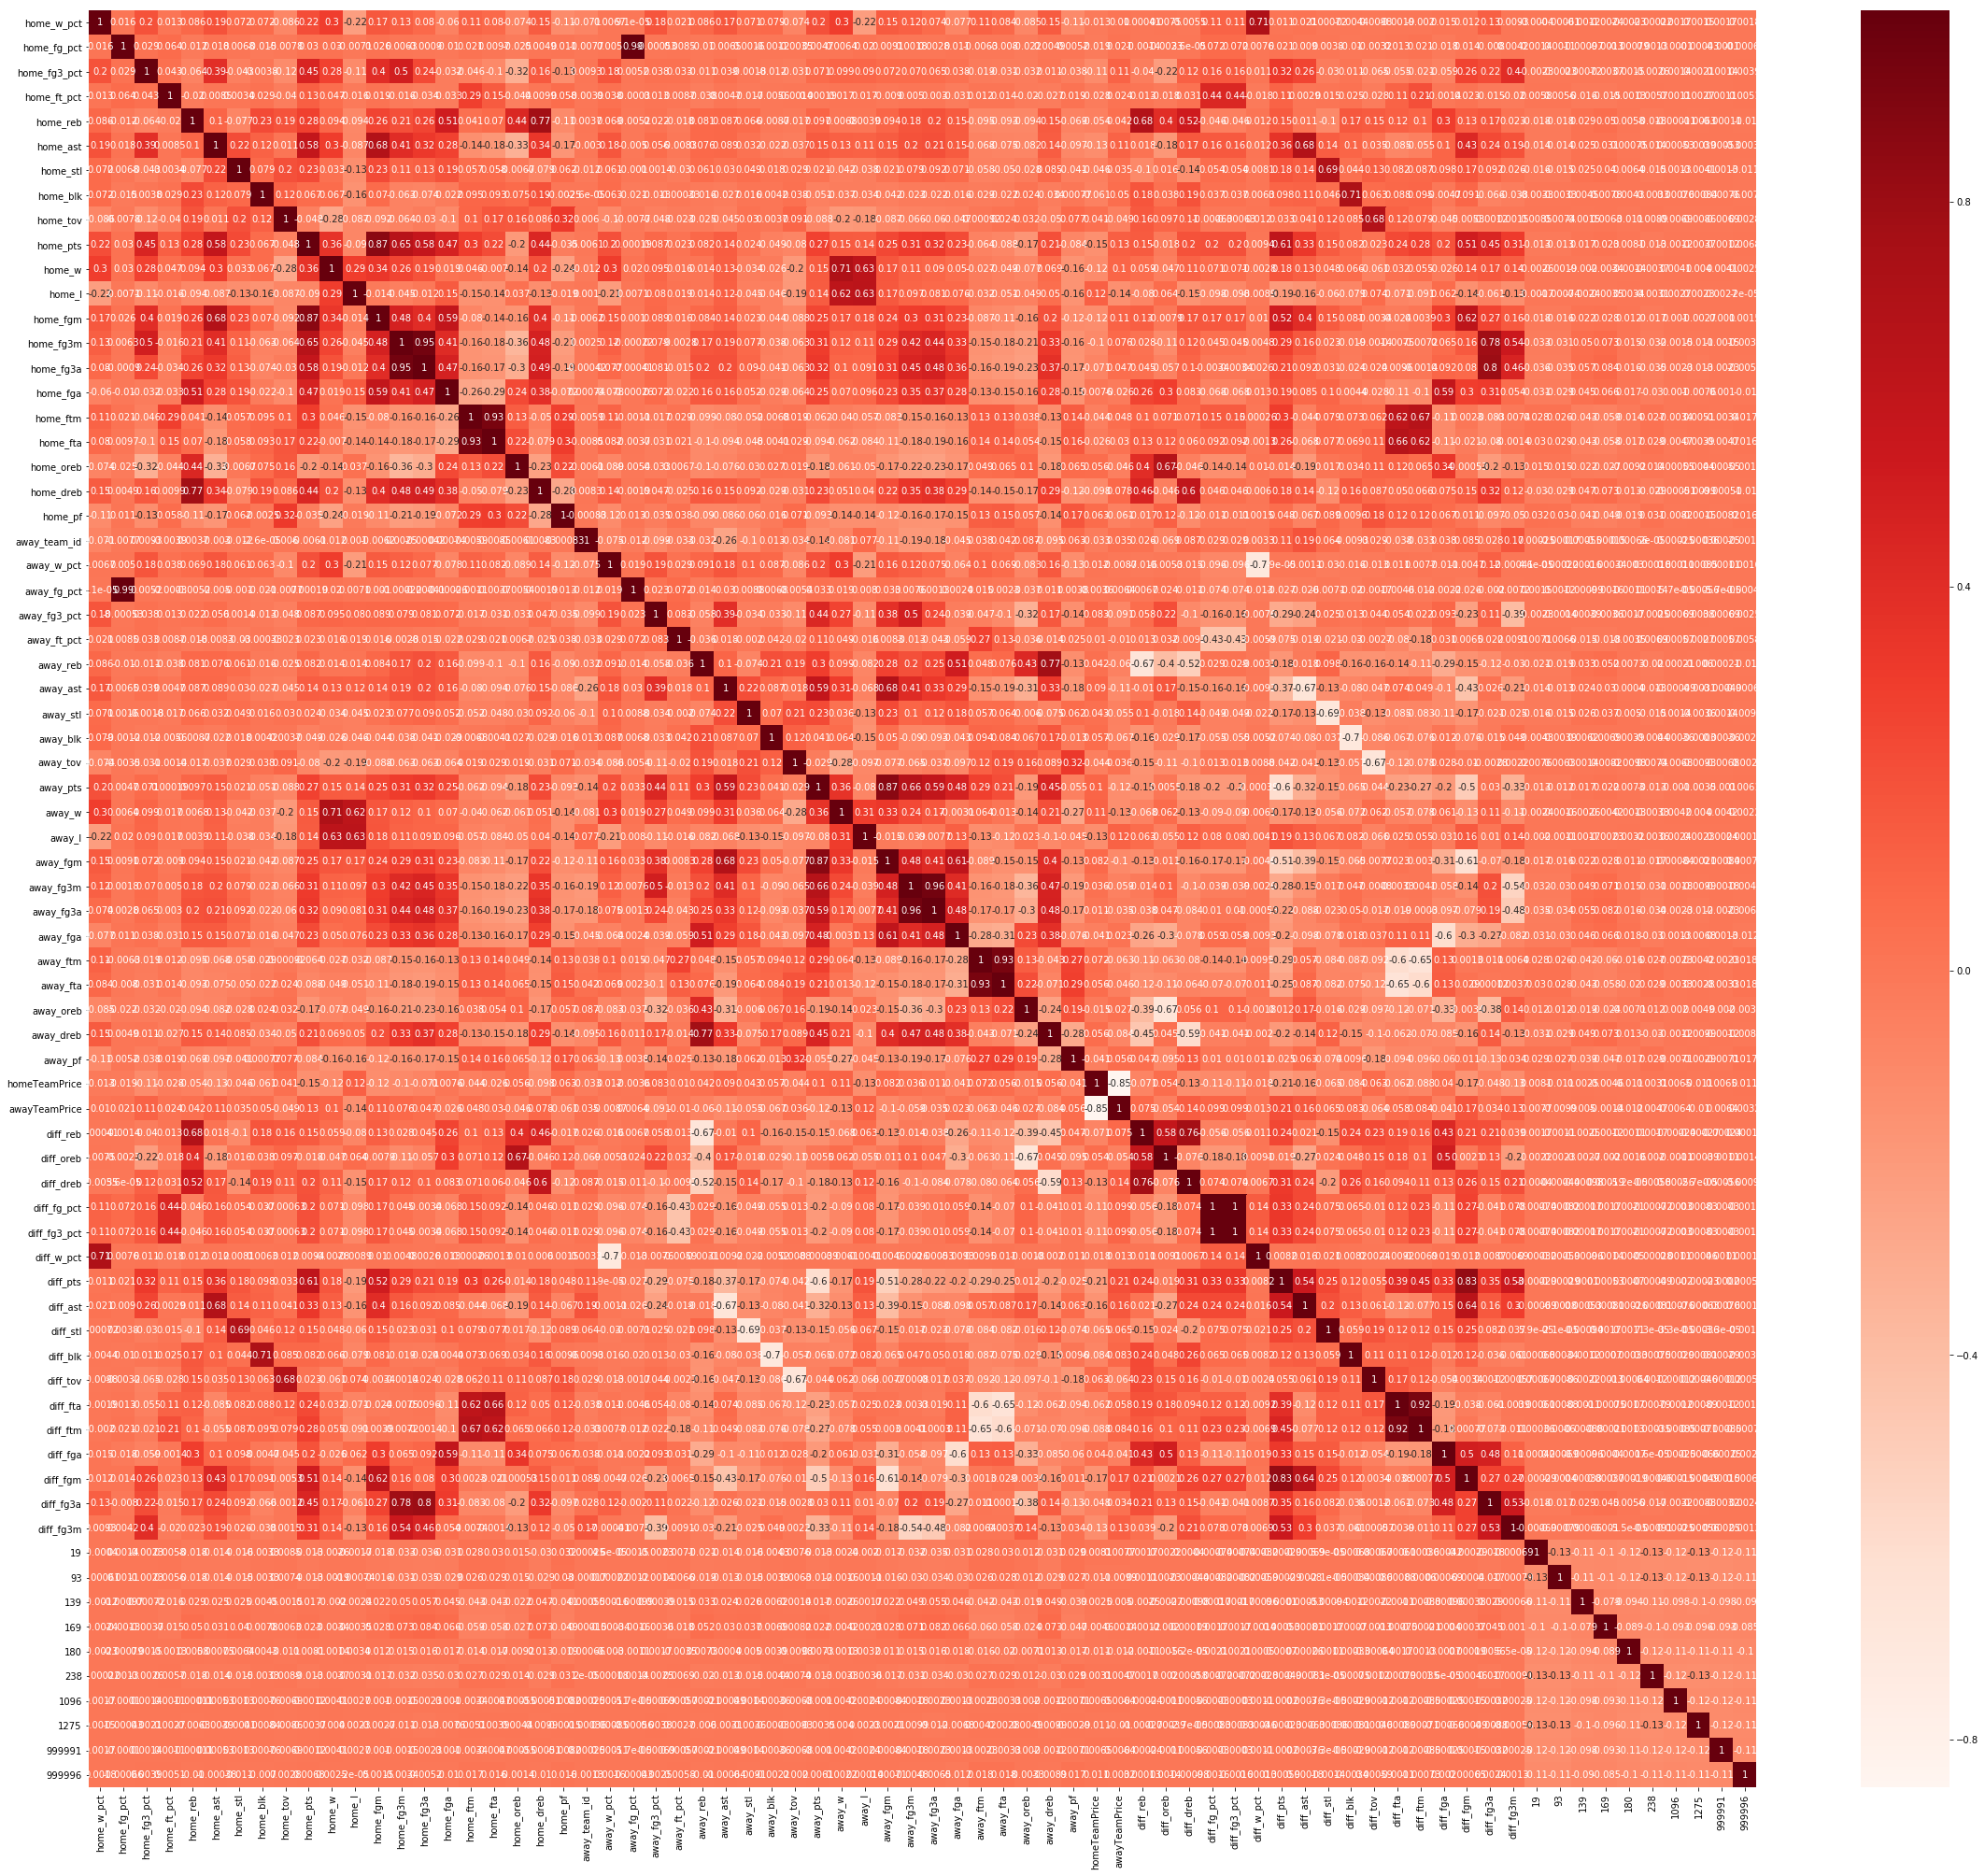

In [15]:
plt.figure(figsize=(40,35))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Hometeam Price Investigation

In [16]:
#Correlation with home team price variable
cor_target_home = abs(cor["homeTeamPrice"])
cor_target_home.sort_values(ascending=False)

homeTeamPrice    1.000000
awayTeamPrice    0.849881
diff_pts         0.206100
diff_fgm         0.167341
diff_ast         0.159403
                   ...   
999991           0.006519
169              0.004588
away_fg_pct      0.003568
238              0.003076
139              0.002508
Name: homeTeamPrice, Length: 72, dtype: float64

In [17]:
reg = LassoCV()
reg.fit(X, yHome)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,yHome))
coef = pd.Series(reg.coef_, index = X.columns)

c:\users\jorda\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 5.868200
Best score using built-in LassoCV: 0.106129


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 37 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

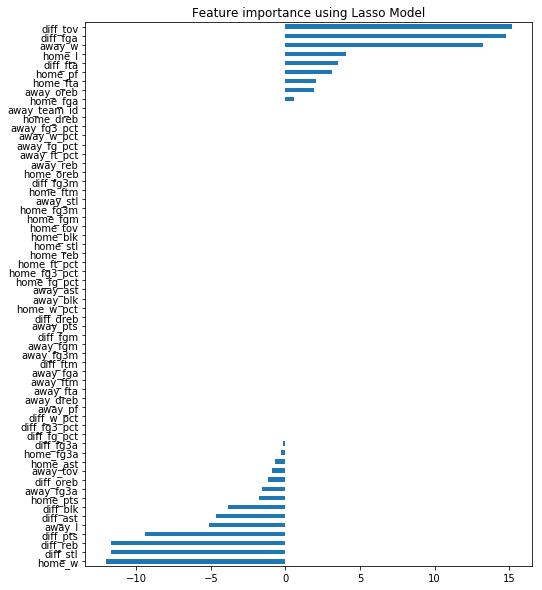

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Awayteam Price Investigation

In [20]:
#Correlation with away team price variable
cor_target_away = abs(cor["awayTeamPrice"])
cor_target_away.sort_values(ascending=False)

awayTeamPrice    1.000000
homeTeamPrice    0.849881
diff_pts         0.206211
diff_fgm         0.170303
diff_ast         0.163785
                   ...   
999991           0.006369
139              0.005017
238              0.004736
999996           0.003193
169              0.001382
Name: awayTeamPrice, Length: 72, dtype: float64

In [21]:
reg = LassoCV()
reg.fit(X, yAway)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,yAway))
coef = pd.Series(reg.coef_, index = X.columns)

c:\users\jorda\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 5.281848
Best score using built-in LassoCV: 0.109629


In [22]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated the other 39 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

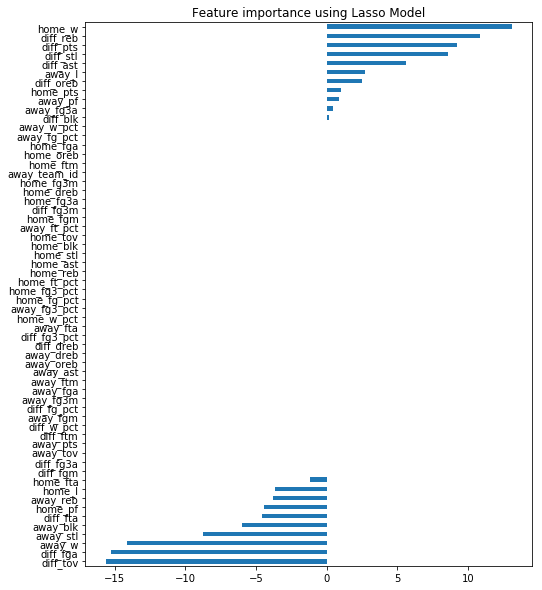

In [23]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Back to modeling

In [24]:
# Removing outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [25]:
X = df[['diff_tov','diff_fga','away_w','home_l','diff_fta','home_pf','home_fta','away_oreb',
       'home_fga','home_w','diff_stl','diff_reb','diff_pts','away_l','diff_ast','diff_blk',
       'home_pts','away_fg3a','diff_oreb','away_tov','home_ast', 19, 93,
                   139,             169,             180,             238,
                  1096,            1275,          999991,          999996]]
y = df[['homeTeamPrice','awayTeamPrice']]

In [26]:
# Normalizing Data
from sklearn import preprocessing
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [27]:
y.describe()
y.shape

(69068, 2)

In [28]:
X.describe()
X.shape

(69068, 31)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.3, random_state=4)

In [30]:
# Merging DF to export for single models
merged = X.join(y)
merged = merged.dropna()
merged.isnull().sum().shape
merged.to_csv('prepped.csv',index=False)


In [31]:
df.head()

,home_w_pct,home_fg_pct,home_fg3_pct,home_ft_pct,home_reb,home_ast,home_stl,home_blk,home_tov,home_pts,...,19,93,139,169,180,238,1096,1275,999991,999996
0,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,6.979167,3.885417,12.8125,109.354167,...,0,0,0,0,0,1,0,0,0,0
1,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,6.979167,3.885417,12.8125,109.354167,...,0,1,0,0,0,0,0,0,0,0
2,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,6.979167,3.885417,12.8125,109.354167,...,0,0,0,0,0,0,1,0,0,0
7,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,6.979167,3.885417,12.8125,109.354167,...,0,0,0,0,0,0,0,1,0,0
8,0.572719,0.473792,0.366729,1.0,41.864583,22.614583,6.979167,3.885417,12.8125,109.354167,...,0,0,0,0,0,0,0,0,1,0


### Creating a GridSearchCV to Find Parameters

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [33]:
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
tuned_parameters = [{'estimator__max_depth': [3,50,100,300], 'estimator__n_estimators': [10,50,100,300],
                     'estimator__criterion': ['mae']}]

score = 'neg_mean_absolute_error'

In [34]:
#for score in scores:
print("# Tuning hyper-parameters for %s \n" % score)

clf = GridSearchCV(MultiOutputRegressor(RandomForestRegressor()), tuned_parameters, scoring=score, verbose=10)
        
clf.fit(X_train, y_train)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print()
print("Grid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for neg_mean_absolute_error 

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=10 


c:\users\jorda\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=10, score=-263.591, total= 2.3min
[CV] estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV]  estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=10, score=-265.534, total= 2.6min
[CV] estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s


[CV]  estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=10, score=-266.066, total= 2.3min
[CV] estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=50 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.2min remaining:    0.0s


[CV]  estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=50, score=-263.809, total=11.9min
[CV] estimator__criterion=mae, estimator__max_depth=3, estimator__n_estimators=50 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 19.1min remaining:    0.0s


KeyboardInterrupt: 

In [35]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [36]:
MultiOutputRegressor(RandomForestRegressor()).get_params().keys()

dict_keys(['estimator__bootstrap', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

### Instantiating Tuned Model

In [37]:
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=500,
                                                          max_depth=75,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     criterion='mse',
                                                     max_depth=75,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=500,
                                                     n_jobs=None,
                                                     oob_score=False,
                                                   

In [ ]:
y_multirf = regr_multirf.predict(X_test)

In [ ]:
y_multirf = pd.DataFrame(y_pred, columns = ['homeTeamPrice','awayTeamPrice'])

In [ ]:
y_multirf

### Plotting Predictions Compared to Actual

In [ ]:
plt.scatter(y_multirf['homeTeamPrice'], y_multirf['awayTeamPrice'],color='red', alpha = 0.01)
plt.scatter(y_test['homeTeamPrice'], y_test['awayTeamPrice'],color='blue', alpha = 0.01)
plt.show()

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Actual vs. Predicted Moneyline Prices')
axs[0].scatter(y_multirf['homeTeamPrice'], y_multirf['awayTeamPrice'], color = 'red')
axs[1].scatter(y_test['homeTeamPrice'], y_test['awayTeamPrice'], color = 'green')
axs[0].set_xlabel('Home Team Price')
axs[0].set_ylabel('Away Team Price')
axs[1].set_xlabel('Home Team Price')
axs[1].set_ylabel('Away Team Price')
axs[0].title.set_text('Predicted Values')
axs[1].title.set_text('Actual Values')

In [ ]:
plt.scatter(y_multirf['homeTeamPrice'], y_multirf['awayTeamPrice'])
plt.title("Linear Regression Predictions")
plt.xlabel("Home Team Price")
plt.ylabel("Away Team Price")
plt.show()

In [ ]:
plt.scatter(y_multirf['homeTeamPrice'], y_multirf['awayTeamPrice'])
plt.title("Linear Regression Predictions")
plt.xlabel("Home Team Price")
plt.ylabel("Away Team Price")
plt.show()

## Performance Metrics

In [ ]:
regr_multirf.score(X_test, y_test)

In [ ]:
y_multirf = pd.DataFrame(y_multirf, columns = ['homeTeamPrice','awayTeamPrice'])

In [ ]:
homeRMSE = math.sqrt(mean_squared_error(y_multirf['homeTeamPrice'], y_test['homeTeamPrice']))

In [ ]:
homeRMSE

In [ ]:
y_multirf['homeTeamPrice'][:5]

In [ ]:
y_test['homeTeamPrice'][:5]

In [ ]:
awayRMSE = math.sqrt(mean_squared_error(y_multirf['awayTeamPrice'], y_test['awayTeamPrice']))

In [ ]:
awayRMSE

In [ ]:
y_multirf['awayTeamPrice'][:5]

In [ ]:
y_test['awayTeamPrice'][:5]

In [ ]:
import sklearn.metrics as metrics
metrics.r2_score(y_multirf['homeTeamPrice'], y_test['homeTeamPrice'])

In [ ]:
metrics.r2_score(y_multirf['awayTeamPrice'], y_test['awayTeamPrice'])